In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [62]:
# get price data from yfinance
company = 'INFY.NS'
start_date = '2014-06-01'
end_date = '2024-08-03'
yf_data = yf.download(company, start=start_date, end = end_date)
yf_data = yf_data.resample('D').ffill()
yf_data = pd.DataFrame(yf_data['Close'])

[*********************100%%**********************]  1 of 1 completed


In [63]:
data = pd.read_excel("../../data/Infosys.xlsx", skiprows=15, sheet_name = "Data Sheet")
data = data.T

# update header
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header


In [65]:
data['Date'] = pd.to_datetime(data.index)

data = data.set_index(data['Date'])
# data = data.drop(columns=["Date"])
data = data.dropna(axis=1)

In [67]:
# Add price to the data frame
price = yf_data.loc[data['Date']]['Close']
price.values
data['Close'] = price.values

In [82]:
sales = data[['Sales', 'Close']]
sales[:[1]]


TypeError: cannot do slice indexing on DatetimeIndex with these indexers [[1]] of type list

In [23]:
profit_and_loss['Sales'].pct_change()*100

2015-03-31 00:00:00          NaN
2016-03-31 00:00:00    17.108348
2017-03-31 00:00:00     9.677936
2018-03-31 00:00:00     2.975878
2019-03-31 00:00:00    17.232920
2020-03-31 00:00:00     9.816752
2021-03-31 00:00:00    10.662951
2022-03-31 00:00:00    21.069552
2023-03-31 00:00:00    20.655864
2024-03-31 00:00:00     4.703373
Name: Sales, dtype: float64

In [73]:
# Problem = create a percentage change for each column and then create a heat map. 
pl = pd.DataFrame()
for col in sales:
    # print(col)
    pl[col] = sales[col].pct_change()*100

ValueError: Cannot set a DataFrame with multiple columns to the single column Sales

In [74]:
pl.dropna()

""
Date
2015-03-31
2016-03-31
2017-03-31
2018-03-31
2019-03-31
2020-03-31
2021-03-31
2022-03-31
2023-03-31


<Axes: >

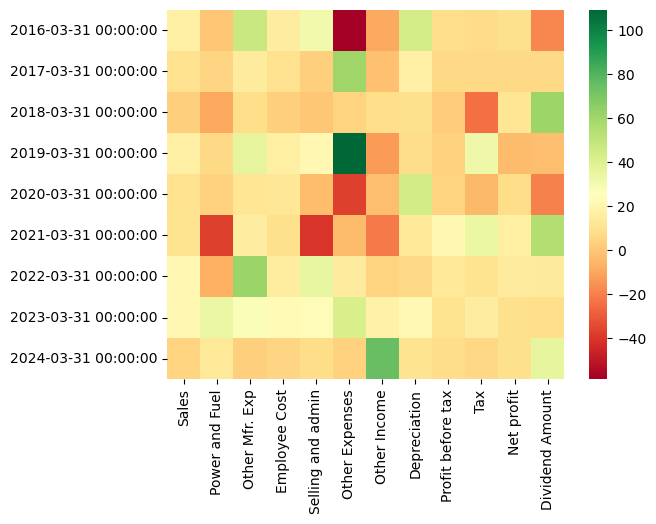

In [32]:
sns.heatmap(pl.dropna(),cmap='RdYlGn')